In [1]:
#pip install mlxtend 
#pip install seaborn
#pip install seaborn[stats]

In [2]:
import pyarrow as pa
import pandas as pd
import numpy as np
import os
import pyarrow.parquet as pq
import fastparquet
import matplotlib.pyplot as plt
import seaborn as sns
from efficient_apriori import apriori

In [3]:
df = pd.read_parquet('/home/vinicius.vancellote/data/BaseAnalise2.parquet',engine='fastparquet')
zonas = pd.read_csv('/home/vinicius.vancellote/Codigos_Python/Bases/EstacoesPluviometricas/Zonas_Pluviometricas.csv')

In [4]:
zonas

,OBJECTID,Name,Endereço,Est,Cod,ShapeSTArea,ShapeSTLength
0,1,Região 1,"Av. Niemeyer, 121",Vidigal,1,2.553441e+06,10752.168096
1,2,Região 2,"Av. Pasteur, 35",Urca,2,2.746435e+06,13636.139715
2,3,Região 3,"Estrada da Gávea, 242",Rocinha,3,1.066526e+07,18616.442565
3,4,Região 4,"Estrada do Sumaré, 670",Tijuca,4,1.120025e+07,14796.007172
4,5,Região 5,"Rua Almirante Alexandrino, 1761",Santa Teresa,5,7.901403e+06,12116.409552
5,6,Região 6,"Av. Atlântica, 4240",Copacabana,6,7.422574e+06,13793.063174
6,7,Região 7,"Rua Professor Valadares, 262",Grajaú,7,1.947898e+07,19309.133736
7,8,Região 8,"Rua Orestes Barbosa, 229",Ilha do Governador,8,3.733704e+07,57467.133777
8,9,Região 9,"Largo da Penha, 19",Penha,9,2.979620e+07,36611.597987
9,10,Região 10,"Largo da Penha, 19",Madureira,10,3.738247e+07,32071.857528


In [5]:
condicao = [df['acumulado_chuva_1_h']==0.0,df['acumulado_chuva_1_h']<5.0,df['acumulado_chuva_1_h']<=25.0,df['acumulado_chuva_1_h']<=50.0]
resultados = ['Sem_Chuva','Chuva_Fraca','Chuva_Moderada','Chuva_Forte']
df['Class_Chuva']=np.select(condicao,resultados,'Chuva_Muito_Forte')

velocidade = [df['velocidade_inst']<1.81,df['velocidade_inst']<7.47,df['velocidade_inst']<11.64,df['velocidade_inst']<16.03,df['velocidade_inst']<20.53,df['velocidade_inst']<25.17,df['velocidade_inst']<29.62,df['velocidade_inst']<39.31]
velocidade_cat = [0,1,2,3,4,5,6,7]
df['velocidade_cat']=np.select(velocidade,velocidade_cat,8)

df['Ano'] = df['data_particao'].dt.year
df['Mes'] = df['data_particao'].dt.month
df['Dia'] = df['data_particao'].dt.day
df['Dia_Semana'] = df['data_particao'].dt.dayofweek

In [6]:
df=df.sort_values(by=['data_particao','horario'],ignore_index=True)
df.head()

,data_particao,horario,id_estacao,acumulado_chuva_15_min,acumulado_chuva_1_h,acumulado_chuva_4_h,acumulado_chuva_24_h,acumulado_chuva_96_h,velocidade_inst,agitacao_soma,agitacao_media,avgspeed,qtd_onibus,qtd_registros,Class_Chuva,velocidade_cat,Ano,Mes,Dia,Dia_Semana
0,2019-08-01,00:15:00,1.0,0.0,0.0,0.0,0.0,0.0,9.067500,3.975149,0.305781,12.290490,7,16,Sem_Chuva,2,2019,8,1,3
1,2019-08-01,00:15:00,10.0,0.0,0.0,0.0,0.0,0.0,3.397158,273.970581,0.067100,3.195625,553,4595,Sem_Chuva,1,2019,8,1,3
2,2019-08-01,00:15:00,11.0,0.0,0.0,0.0,0.0,0.0,9.411651,193.177068,0.181899,9.125023,208,1254,Sem_Chuva,2,2019,8,1,3
3,2019-08-01,00:15:00,12.0,0.0,0.0,0.0,0.0,0.0,4.817308,255.956765,0.095399,5.088665,251,2912,Sem_Chuva,1,2019,8,1,3
4,2019-08-01,00:15:00,13.0,0.0,0.0,0.0,0.0,0.0,19.051677,46.012873,0.359476,19.126461,51,155,Sem_Chuva,4,2019,8,1,3


In [7]:
list_estacao = list(df['id_estacao'].unique())
new_columns=list(df.columns)
new_columns.append('acumulado_chuva_30_min')
new_columns.append('acumulado_chuva_45_min')
data_frame_result = pd.DataFrame(columns=new_columns)
data_frame_list = list()
if len(list_estacao)>0:
    for estacao in list_estacao:
        slice = df[df['id_estacao'] == estacao]
        estacao_df = pd.DataFrame(slice)
        estacao_df['acumulado_chuva_30_min'] = estacao_df['acumulado_chuva_15_min'].shift(periods = 1, fill_value=0) + estacao_df['acumulado_chuva_15_min']
        estacao_df['acumulado_chuva_45_min'] = estacao_df['acumulado_chuva_15_min'].shift(periods = 2, fill_value=0) + estacao_df['acumulado_chuva_15_min'].shift(periods = 1, fill_value=0) + estacao_df['acumulado_chuva_15_min']
        estacao_df.index=np.arange(len(estacao_df))
        data_frame_list.append(estacao_df)
    data_frame_result = pd.concat(data_frame_list,ignore_index=True)

data_frame_result = data_frame_result[['data_particao','horario','id_estacao','acumulado_chuva_15_min','acumulado_chuva_30_min','acumulado_chuva_45_min','acumulado_chuva_1_h','acumulado_chuva_4_h','acumulado_chuva_24_h','acumulado_chuva_96_h','velocidade_inst','agitacao_soma','agitacao_media','avgspeed','qtd_onibus','qtd_registros','Class_Chuva','Ano','Mes','Dia']]
data_frame_result.head()

,data_particao,horario,id_estacao,acumulado_chuva_15_min,acumulado_chuva_30_min,acumulado_chuva_45_min,acumulado_chuva_1_h,acumulado_chuva_4_h,acumulado_chuva_24_h,acumulado_chuva_96_h,velocidade_inst,agitacao_soma,agitacao_media,avgspeed,qtd_onibus,qtd_registros,Class_Chuva,Ano,Mes,Dia
0,2019-08-01,00:15:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.067500,3.975149,0.305781,12.290490,7,16,Sem_Chuva,2019,8,1
1,2019-08-01,00:30:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.727273,9.354307,0.850392,21.773449,5,11,Sem_Chuva,2019,8,1
2,2019-08-01,00:45:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.757500,7.655363,0.478460,21.729744,6,16,Sem_Chuva,2019,8,1
3,2019-08-01,01:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000,3.458453,0.494065,34.308566,2,7,Sem_Chuva,2019,8,1
4,2019-08-01,01:15:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.193333,4.509629,0.501070,20.352730,4,9,Sem_Chuva,2019,8,1


In [53]:
velocidade = [df['velocidade_inst']<1.81,df['velocidade_inst']<7.47,df['velocidade_inst']<11.64,df['velocidade_inst']<16.03,df['velocidade_inst']<20.53,df['velocidade_inst']<25.17,df['velocidade_inst']<29.62,df['velocidade_inst']<39.31]
velocidade_cat = [0,1,2,3,4,5,6,7]
df['velocidade_cat']=np.select(velocidade,velocidade_cat,8)
df['Dia_Semana'] = df['data_particao'].dt.dayofweek

In [9]:
df = data_frame_result
df.head()

,data_particao,horario,id_estacao,acumulado_chuva_15_min,acumulado_chuva_30_min,acumulado_chuva_45_min,acumulado_chuva_1_h,acumulado_chuva_4_h,acumulado_chuva_24_h,acumulado_chuva_96_h,velocidade_inst,agitacao_soma,agitacao_media,avgspeed,qtd_onibus,qtd_registros,Class_Chuva,Ano,Mes,Dia
0,2019-08-01,00:15:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.067500,3.975149,0.305781,12.290490,7,16,Sem_Chuva,2019,8,1
1,2019-08-01,00:30:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.727273,9.354307,0.850392,21.773449,5,11,Sem_Chuva,2019,8,1
2,2019-08-01,00:45:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.757500,7.655363,0.478460,21.729744,6,16,Sem_Chuva,2019,8,1
3,2019-08-01,01:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000,3.458453,0.494065,34.308566,2,7,Sem_Chuva,2019,8,1
4,2019-08-01,01:15:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.193333,4.509629,0.501070,20.352730,4,9,Sem_Chuva,2019,8,1


In [10]:
#Abrindo o dataset em Agosto e Dezembro
df_ago = df[df["data_particao"].dt.month==8]
df_dez = df[df["data_particao"].dt.month==12]

In [11]:
df['id_estacao']=df['id_estacao'].astype(float)
df_ago['id_estacao']=df_ago['id_estacao'].astype(float)
df_dez['id_estacao']=df_dez['id_estacao'].astype(float)

<ipython-input-11-d378d0167077>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ago['id_estacao']=df_ago['id_estacao'].astype(float)
<ipython-input-11-d378d0167077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dez['id_estacao']=df_dez['id_estacao'].astype(float)


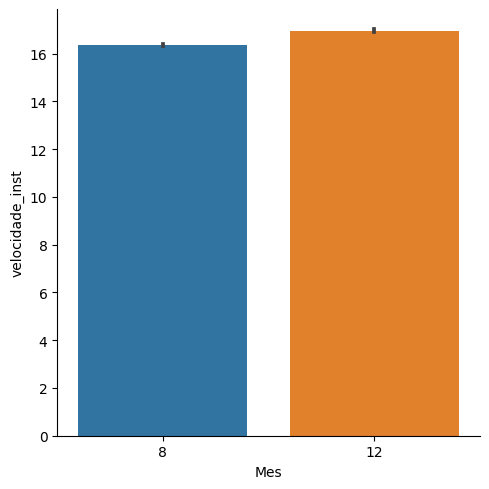

In [12]:
#Comparando as velocidades por mês
sns.catplot(x = 'Mes',
           y = 'velocidade_inst',
           data = df,
           kind = 'bar')
plt.show()

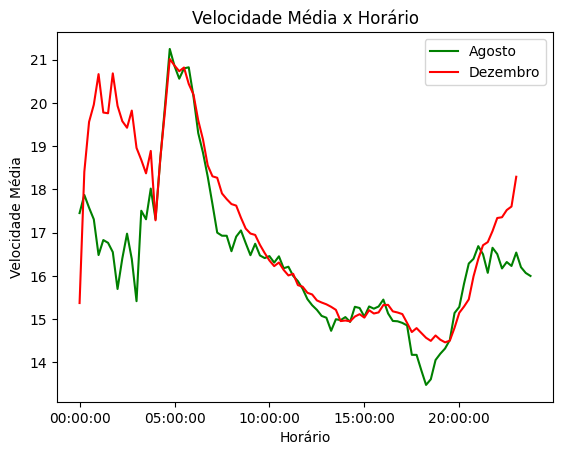

In [13]:
#Comparando as velocidades por horario
df_ago.groupby(df_ago['horario'])["velocidade_inst"].mean().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['horario'])["velocidade_inst"].mean().plot(color='red',label='Dezembro')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [14]:
#Comparando a velocidade por dia da semana e mês
sns.catplot(x = 'Dia_Semana',
            y = 'velocidade_inst',
            hue = 'Mes',
            data = df,
            kind = 'bar')
plt.show()

ValueError: Could not interpret input 'Dia_Semana'

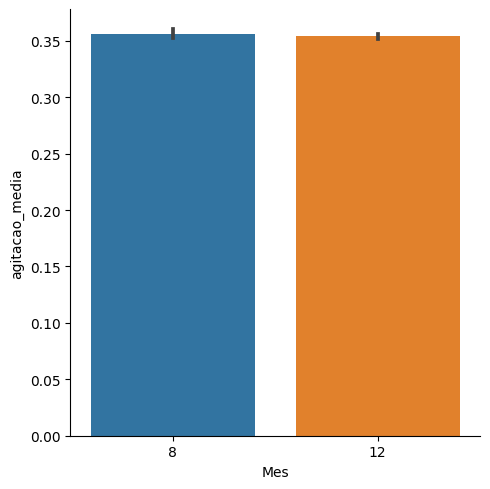

In [15]:
#Comparando Agitação Média por Mês

sns.catplot(x = 'Mes',
           y = 'agitacao_media',
           data = df,
           kind = 'bar')
plt.show()

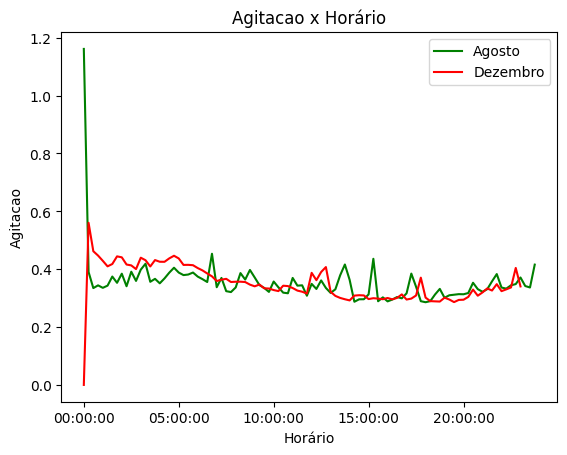

In [16]:
#Comparando as agitacoes
df_ago.groupby(df_ago['horario'])["agitacao_media"].mean().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['horario'])["agitacao_media"].mean().plot(color='red',label='Dezembro')
plt.title("Agitacao x Horário")
plt.xlabel("Horário")
plt.ylabel("Agitacao")
plt.legend()
plt.show()

In [17]:
#Comparando a agitacao por dia da semana e mês
sns.catplot(x = 'Dia_Semana',
            y = 'agitacao_media',
            hue = 'Mes',
            data = df,
            kind = 'bar')
plt.show()

ValueError: Could not interpret input 'Dia_Semana'

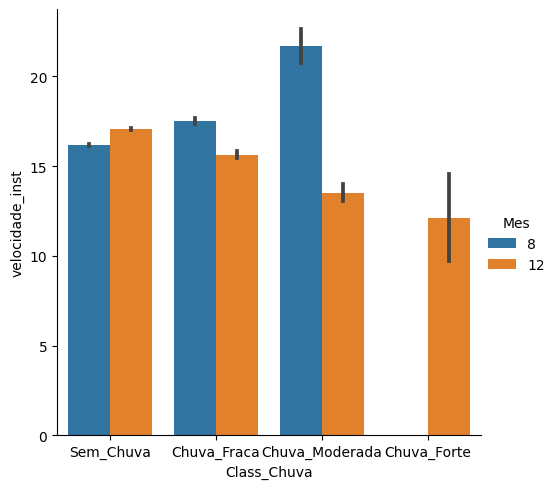

In [18]:
#Comparando a velocidade por classe de chuva
sns.catplot(x = 'Class_Chuva',
            y = 'velocidade_inst',
            hue = 'Mes',
            data = df,
            kind = 'bar')
plt.show()

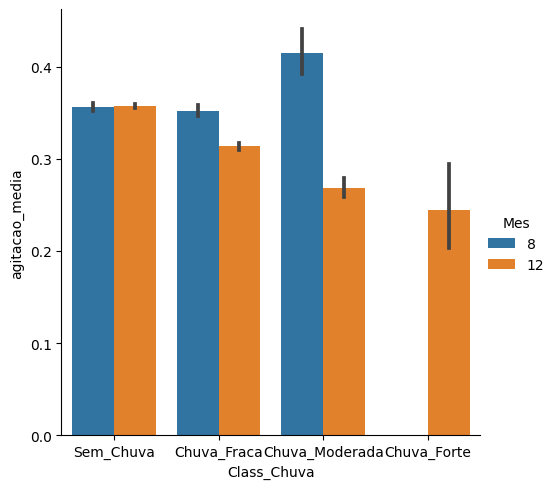

In [19]:
#Comparando a agitacao por classe de chuva
sns.catplot(x = 'Class_Chuva',
            y = 'agitacao_media',
            hue = 'Mes',
            data = df,
            kind = 'bar')
plt.show()

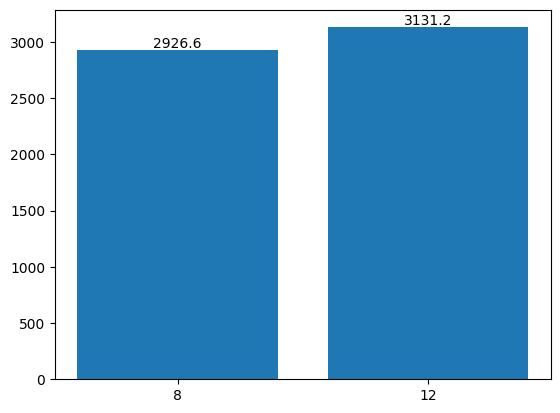

In [20]:
#Comparando as Chuvas
aux = df.groupby(['Mes'],as_index=False)['acumulado_chuva_15_min'].sum()
aux['Mes']=aux['Mes'].astype(str)
bar = plt.bar(aux['Mes'],aux['acumulado_chuva_15_min'],label = df['acumulado_chuva_15_min'])
plt.bar_label(bar)
plt.show()

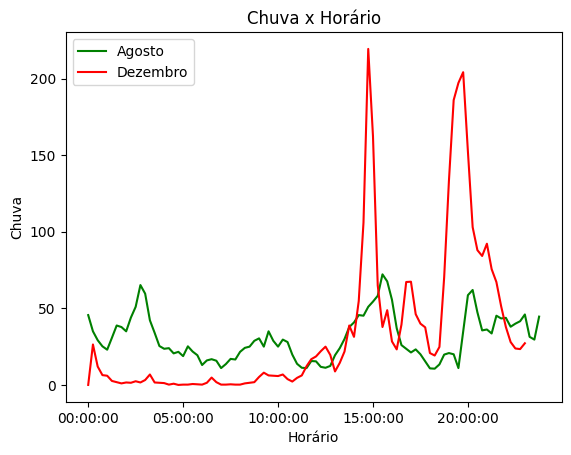

In [21]:
#Comparando as Chuvas
df_ago.groupby(df_ago['horario'])["acumulado_chuva_15_min"].sum().plot(color='green',label='Agosto')
df_dez.groupby(df_dez['horario'])["acumulado_chuva_15_min"].sum().plot(color='red',label='Dezembro')
plt.title("Chuva x Horário")
plt.xlabel("Horário")
plt.ylabel("Chuva")
plt.legend()
plt.show()

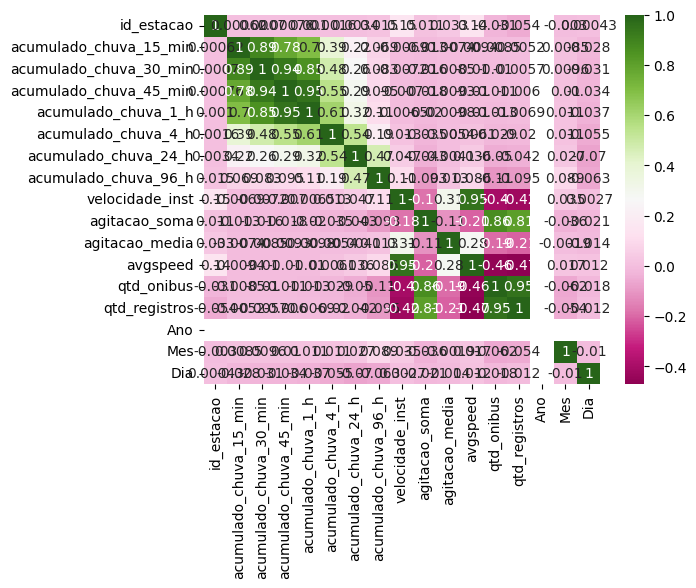

In [22]:
# Mapa de correlação das variáveis numéricas
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

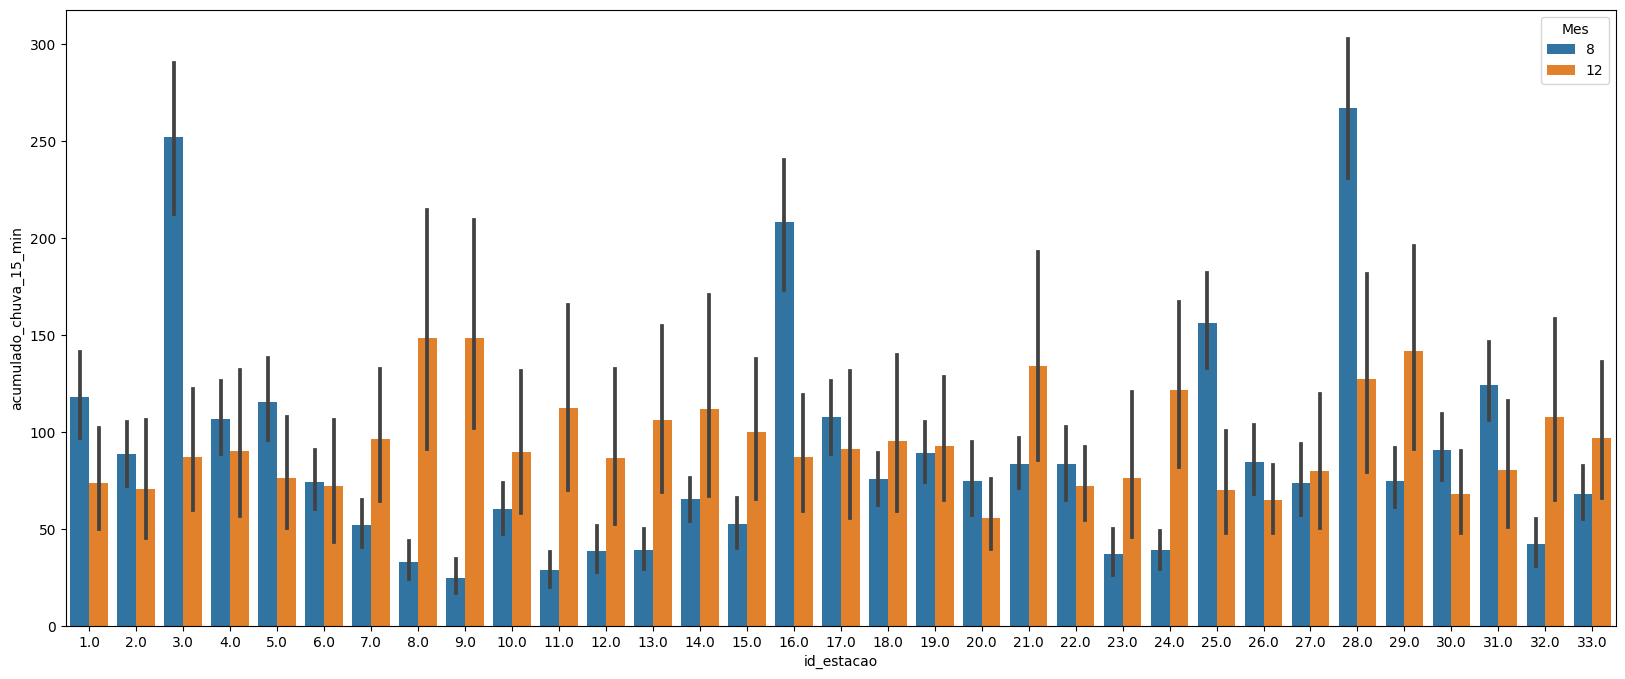

In [64]:
#Comparando a agitacao por classe de chuva
plt.figure(figsize=(20,8))
sns.barplot(data = df,
            x = 'id_estacao',
            y = 'acumulado_chuva_15_min',
            hue = 'Mes',
            estimator = sum)
plt.show()

In [65]:
df.groupby(by=['Mes','id_estacao'],as_index=False).agg(
chuva = pd.NamedAgg(column='acumulado_chuva_15_min',aggfunc='sum'))

,Mes,id_estacao,chuva
0,8,1.0,117.8
1,8,2.0,88.4
2,8,3.0,252.0
3,8,4.0,106.8
4,8,5.0,115.4
...,...,...,...
61,12,29.0,141.8
62,12,30.0,67.8
63,12,31.0,80.4
64,12,32.0,107.6


In [24]:
#Abrindo o dataset por estacao
df_r1= df[df["id_estacao"]==1.0]
df_r2= df[df["id_estacao"]==2.0]
df_r3= df[df["id_estacao"]==3.0]
df_r4= df[df["id_estacao"]==4.0]
df_r5= df[df["id_estacao"]==5.0]
df_r6= df[df["id_estacao"]==6.0]
df_r7= df[df["id_estacao"]==7.0]
df_r8= df[df["id_estacao"]==8.0]
df_r9= df[df["id_estacao"]==9.0]
df_r10= df[df["id_estacao"]==10.0]
df_r11= df[df["id_estacao"]==11.0]
df_r12= df[df["id_estacao"]==12.0]
df_r13= df[df["id_estacao"]==13.0]
df_r14= df[df["id_estacao"]==14.0]
df_r15= df[df["id_estacao"]==15.0]
df_r16= df[df["id_estacao"]==16.0]
df_r17= df[df["id_estacao"]==17.0]
df_r18= df[df["id_estacao"]==18.0]
df_r19= df[df["id_estacao"]==19.0]
df_r20= df[df["id_estacao"]==20.0]
df_r21= df[df["id_estacao"]==21.0]
df_r22= df[df["id_estacao"]==22.0]
df_r23= df[df["id_estacao"]==23.0]
df_r24= df[df["id_estacao"]==24.0]
df_r25= df[df["id_estacao"]==25.0]
df_r26= df[df["id_estacao"]==26.0]
df_r27= df[df["id_estacao"]==27.0]
df_r28= df[df["id_estacao"]==28.0]
df_r29= df[df["id_estacao"]==29.0]
df_r30= df[df["id_estacao"]==30.0]
df_r31= df[df["id_estacao"]==31.0]
df_r32= df[df["id_estacao"]==32.0]
df_r33= df[df["id_estacao"]==33.0]

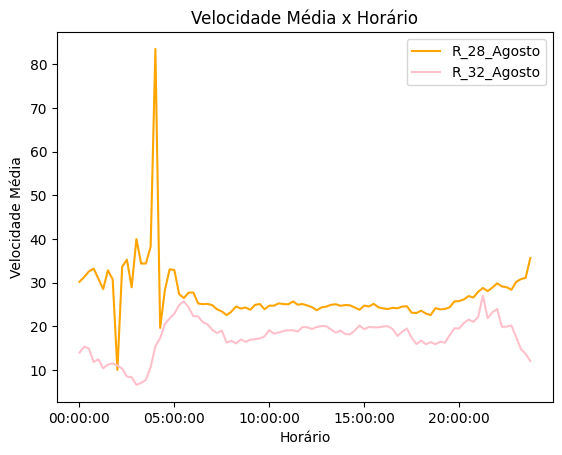

In [25]:
#Comparando as velocidades por região
df_r28.groupby(df_r28[df_r28['data_particao'].dt.month==8]['horario'])["velocidade_inst"].mean().plot(color='orange',label='R_28_Agosto')
df_r32.groupby(df_r32[df_r32['data_particao'].dt.month==8]['horario'])["velocidade_inst"].mean().plot(color='pink',label='R_32_Agosto')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

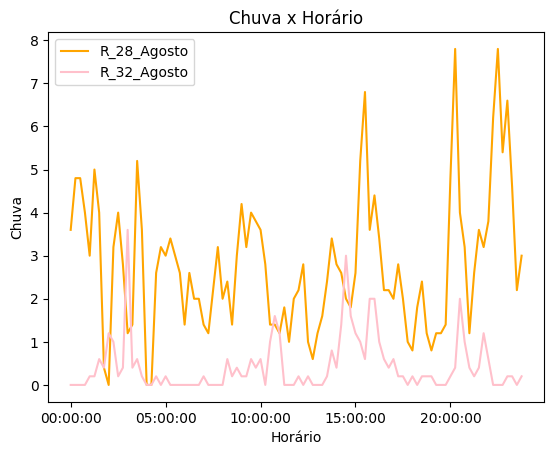

In [26]:
#Comparando as chuvas por região
df_r28.groupby(df_r28[df_r28['data_particao'].dt.month==8]['horario'])["acumulado_chuva_15_min"].sum().plot(color='orange',label='R_28_Agosto')
df_r32.groupby(df_r32[df_r32['data_particao'].dt.month==8]['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='R_32_Agosto')
plt.title("Chuva x Horário")
plt.xlabel("Horário")
plt.ylabel("Chuva")
plt.legend()
plt.show()

In [27]:
table_chuva = df.groupby(by=['data_particao'],as_index=False).agg(
chuva = pd.NamedAgg(column='acumulado_chuva_15_min',aggfunc='sum'))
table_chuva['dia_semana']=table_chuva['data_particao'].dt.dayofweek
table_chuva=table_chuva.sort_values(by=['chuva'],ignore_index=True,ascending=False)
table_chuva

,data_particao,chuva,dia_semana
0,2019-12-23,863.6,0
1,2019-08-04,676.6,6
2,2019-08-03,649.4,5
3,2019-12-22,625.4,6
4,2019-12-05,472.2,3
...,...,...,...
57,2019-08-30,0.0,4
58,2019-08-31,0.0,5
59,2019-12-03,0.0,1
60,2019-12-04,0.0,2


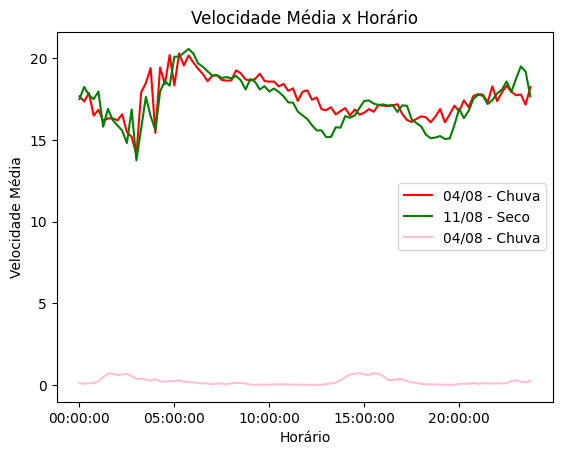

In [28]:
#Comparando as velocidades
df.groupby(df[df['data_particao']=='2019-08-04']['horario'])["velocidade_inst"].mean().plot(color='red',label='04/08 - Chuva')
df.groupby(df[df['data_particao']=='2019-08-11']['horario'])["velocidade_inst"].mean().plot(color='green',label='11/08 - Seco')
df.groupby(df[df['data_particao']=='2019-08-04']['horario'])["acumulado_chuva_15_min"].mean().plot(color='pink',label='04/08 - Chuva')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

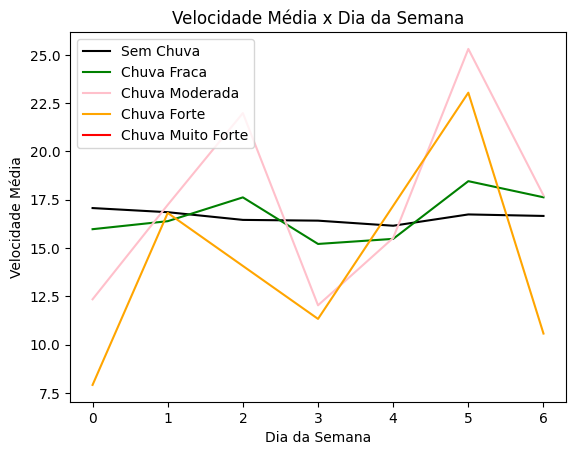

In [29]:
df.groupby(df[df['Class_Chuva']=='Sem_Chuva']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='black',label='Sem Chuva')
df.groupby(df[df['Class_Chuva']=='Chuva_Fraca']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='green',label='Chuva Fraca')
df.groupby(df[df['Class_Chuva']=='Chuva_Moderada']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='pink',label='Chuva Moderada')
df.groupby(df[df['Class_Chuva']=='Chuva_Forte']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='orange',label='Chuva Forte')
df.groupby(df[df['Class_Chuva']=='Chuva_Muito_Forte']['data_particao'].dt.dayofweek)["velocidade_inst"].mean().plot(color='red',label='Chuva Muito Forte')
plt.title("Velocidade Média x Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [30]:
table_classchuva = df.groupby(by=['Class_Chuva'],as_index=False)['qtd_registros'].sum()
table_classchuva

,Class_Chuva,qtd_registros
0,Chuva_Forte,44113
1,Chuva_Fraca,17975268
2,Chuva_Moderada,1120197
3,Sem_Chuva,227774711


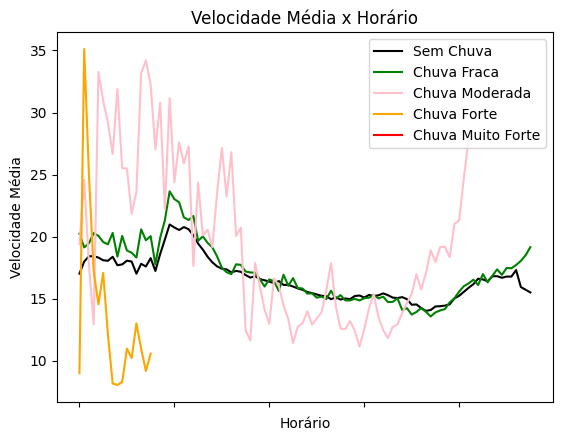

In [31]:
df.groupby(df[df['Class_Chuva']=='Sem_Chuva']['horario'])["velocidade_inst"].mean().plot(color='black',label='Sem Chuva')
df.groupby(df[df['Class_Chuva']=='Chuva_Fraca']['horario'])["velocidade_inst"].mean().plot(color='green',label='Chuva Fraca')
df.groupby(df[df['Class_Chuva']=='Chuva_Moderada']['horario'])["velocidade_inst"].mean().plot(color='pink',label='Chuva Moderada')
df.groupby(df[df['Class_Chuva']=='Chuva_Forte']['horario'])["velocidade_inst"].mean().plot(color='orange',label='Chuva Forte')
df.groupby(df[df['Class_Chuva']=='Chuva_Muito_Forte']['horario'])["velocidade_inst"].mean().plot(color='red',label='Chuva Muito Forte')
plt.title("Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [32]:
df_semchuva= df[df["Class_Chuva"]=='Sem_Chuva']
df_chuvafraca= df[df["Class_Chuva"]=='Chuva_Fraca']
df_chuvamoderada= df[df["Class_Chuva"]=='Chuva_Moderada']
df_chuvaforte= df[df["Class_Chuva"]=='Chuva_Forte']
df_chuvamtforte= df[df["Class_Chuva"]=='Chuva_Muito_Forte']

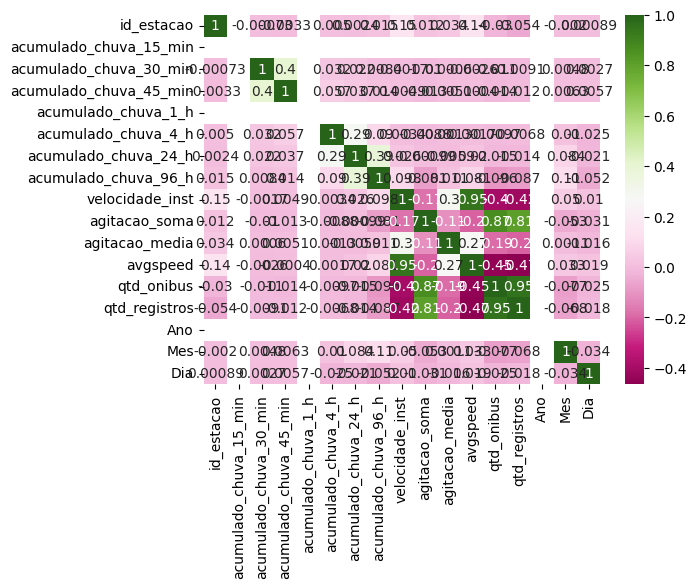

In [33]:
# Mapa de correlação das variáveis numéricas semchuva
sns.heatmap(df_semchuva.corr(), annot=True, cmap="PiYG")
plt.show()

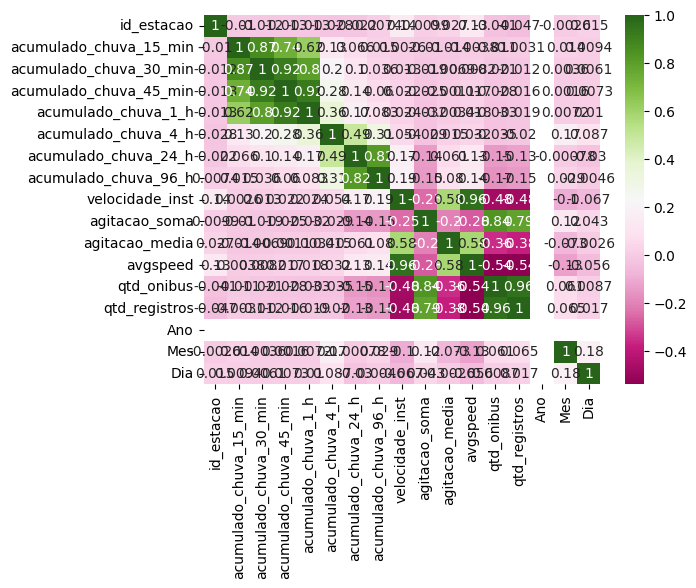

In [34]:
# Mapa de correlação das variáveis numéricas chuvafraca
sns.heatmap(df_chuvafraca.corr(), annot=True, cmap="PiYG")
plt.show()

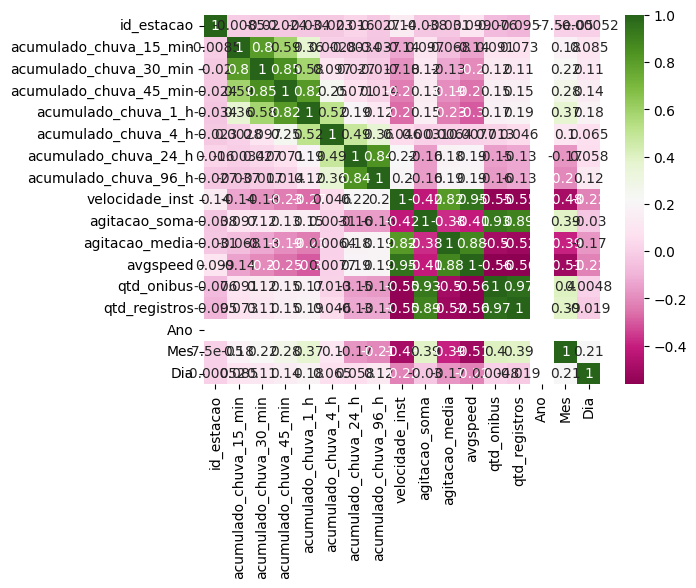

In [35]:
# Mapa de correlação das variáveis numéricas chuvamoderada
sns.heatmap(df_chuvamoderada.corr(), annot=True, cmap="PiYG")
plt.show()

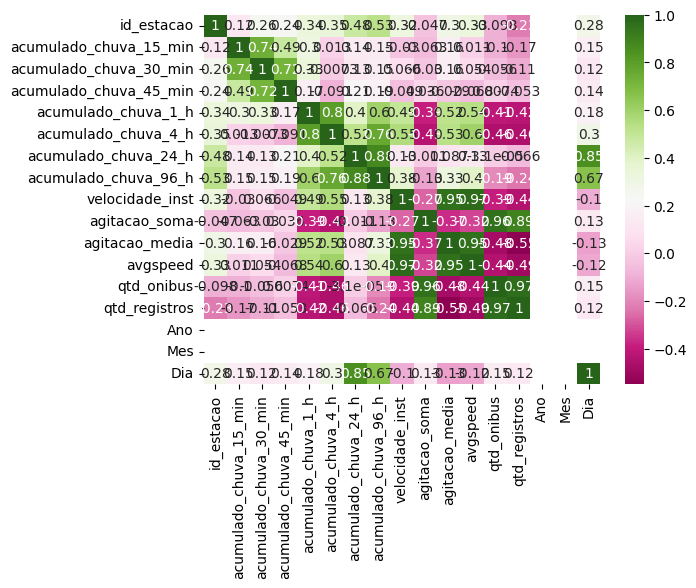

In [36]:
# Mapa de correlação das variáveis numéricas chuvaforte
sns.heatmap(df_chuvaforte.corr(), annot=True, cmap="PiYG")
plt.show()

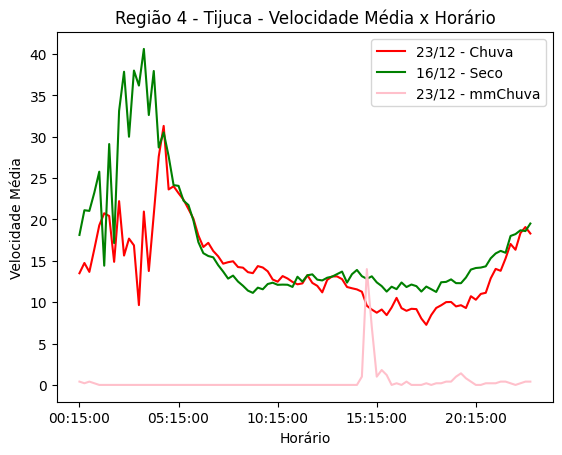

In [37]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='23/12 - Chuva')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["velocidade_inst"].mean().plot(color='green',label='16/12 - Seco')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='23/12 - mmChuva')
plt.title("Região 4 - Tijuca - Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

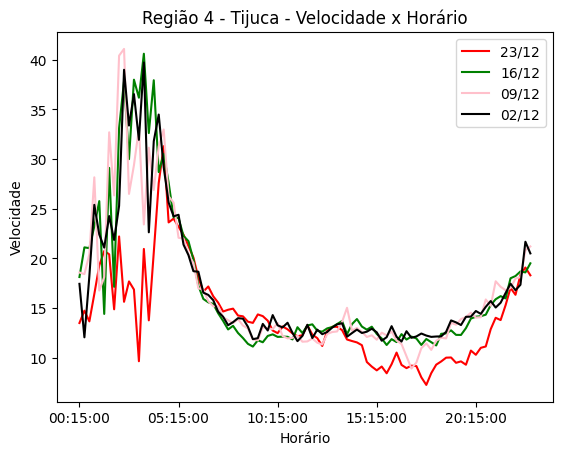

In [38]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='23/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["velocidade_inst"].mean().plot(color='green',label='16/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-09']['horario'])["velocidade_inst"].mean().plot(color='pink',label='09/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-02']['horario'])["velocidade_inst"].mean().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Velocidade x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade")
plt.legend()
plt.show()

In [39]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["agitacao"].sum().plot(color='red',label='23/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["agitacao"].sum().plot(color='green',label='16/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-09']['horario'])["agitacao"].sum().plot(color='pink',label='09/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-02']['horario'])["agitacao"].sum().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Agitação x Horário")
plt.xlabel("Horário")
plt.ylabel("Agitação")
plt.legend()
plt.show()

KeyError: 'Column not found: agitacao'

In [ ]:
#Comparando as velocidades
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='red',label='23/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-16']['horario'])["acumulado_chuva_15_min"].sum().plot(color='green',label='16/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-09']['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='09/12')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-02']['horario'])["acumulado_chuva_15_min"].sum().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Chuva x Horário")
plt.xlabel("Horário")
plt.ylabel("Chuva")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='pink',label='Barra')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='Tijuca')
df_r4.groupby(df_r4[df_r4['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='red',label='mmChuva Tijuca')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-23']['horario'])["acumulado_chuva_15_min"].sum().plot(color='pink',label='mmChuva Barra')
plt.title("Barra x Tijuca - Velocidade Média x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade Média")
plt.legend()
plt.show()

In [ ]:
#Comparando as velocidades
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-23']['horario'])["velocidade_inst"].mean().plot(color='red',label='23/12')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-16']['horario'])["velocidade_inst"].mean().plot(color='green',label='16/12')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-09']['horario'])["velocidade_inst"].mean().plot(color='pink',label='09/12')
df_r19.groupby(df_r19[df_r19['data_particao']=='2019-12-02']['horario'])["velocidade_inst"].mean().plot(color='black',label='02/12')
plt.title("Região 4 - Tijuca - Velocidade x Horário")
plt.xlabel("Horário")
plt.ylabel("Velocidade")
plt.legend()
plt.show()

In [ ]:
df.columns

In [40]:
#Definindo Dataframe que será aplicada a correlação
df_cor = df[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h','qtd_onibus']]

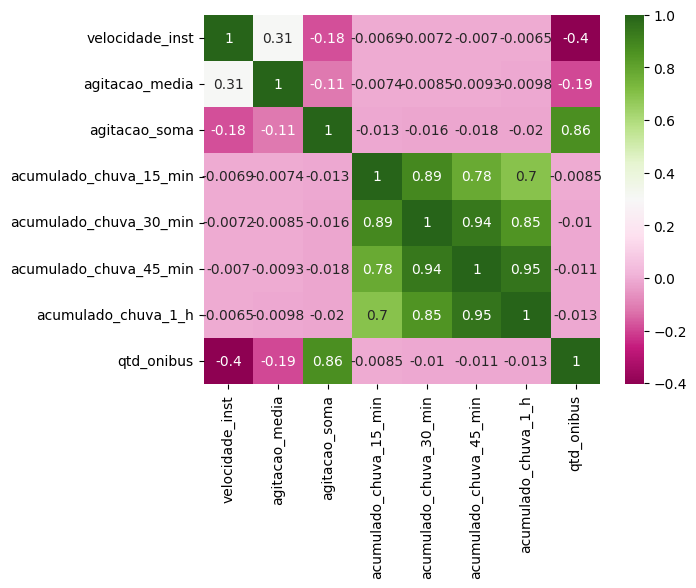

In [41]:
sns.heatmap(df_cor.corr(),annot=True,cmap='PiYG')
plt.show()

In [42]:
df_chuva = df[(df['Class_Chuva']!='Sem_Chuva') & (df['Class_Chuva']!='Chuva_Fraca')]

In [43]:
df_cor2 = df_chuva[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h']]

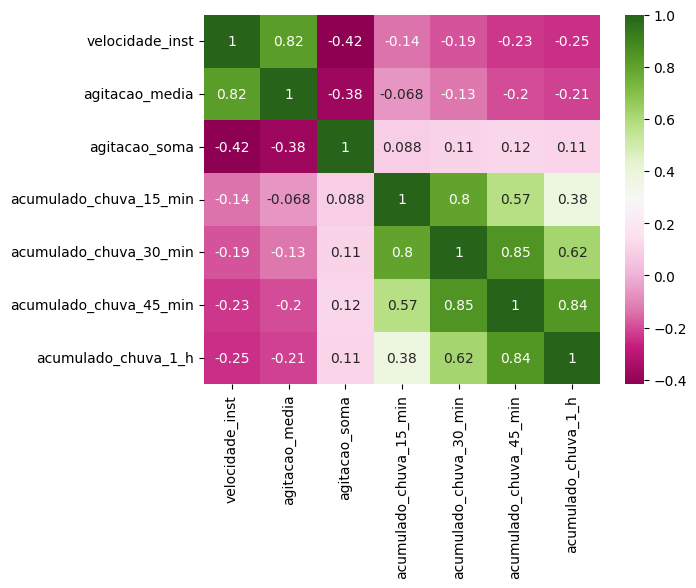

In [44]:
sns.heatmap(df_cor2.corr(),annot=True,cmap='PiYG')
plt.show()

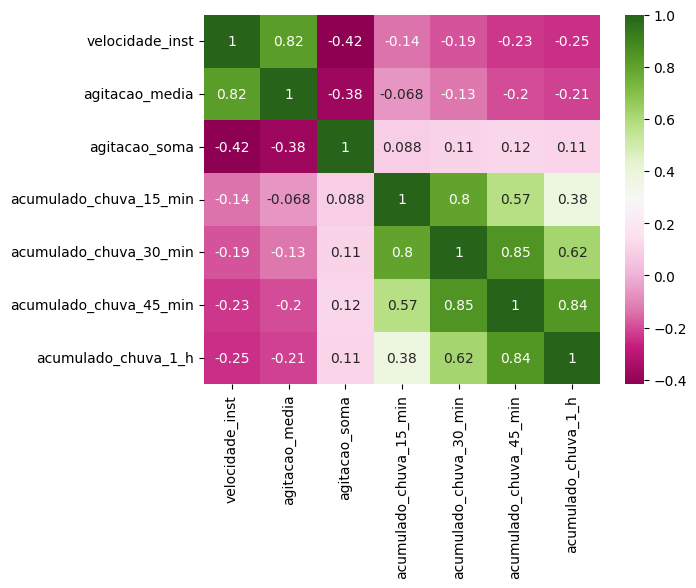

In [45]:
df_chuva2 = df[(df['Class_Chuva']!='Sem_Chuva') & (df['Class_Chuva']!='Chuva_Fraca')]
df_cor3 = df_chuva2[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h']]
sns.heatmap(df_cor3.corr(),annot=True,cmap='PiYG')
plt.show()

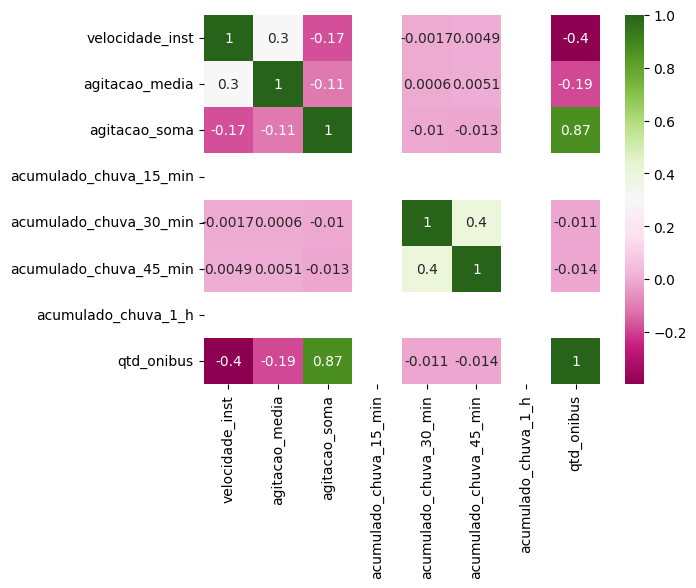

In [46]:
#Correlação DF Sem Chuva
df_sem_chuva = df[(df['Class_Chuva']=='Sem_Chuva')]
df_cor = df_sem_chuva[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h','qtd_onibus']]
sns.heatmap(df_cor.corr(),annot=True,cmap='PiYG')
plt.show()

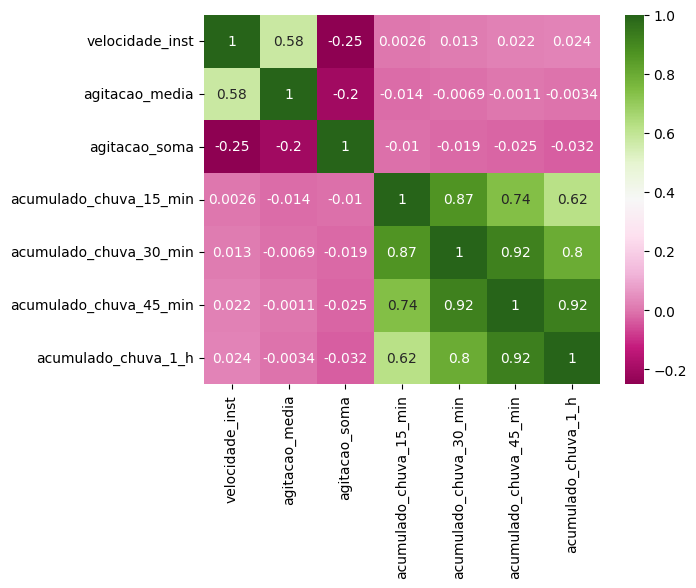

In [47]:
#Correlação DF Chuva Fraca
df_chuva = df[(df['Class_Chuva']=='Chuva_Fraca')]
df_cor = df_chuva[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h']]
sns.heatmap(df_cor.corr(),annot=True,cmap='PiYG')
plt.show()

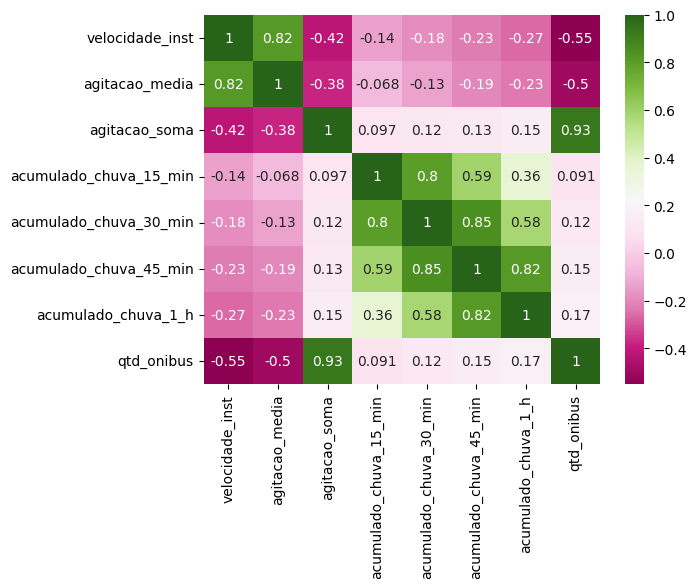

In [48]:
#Correlação DF Chuva Moderada
df_chuva = df[(df['Class_Chuva']=='Chuva_Moderada')]
df_cor = df_chuva[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h','qtd_onibus']]
sns.heatmap(df_cor.corr(),annot=True,cmap='PiYG')
plt.show()

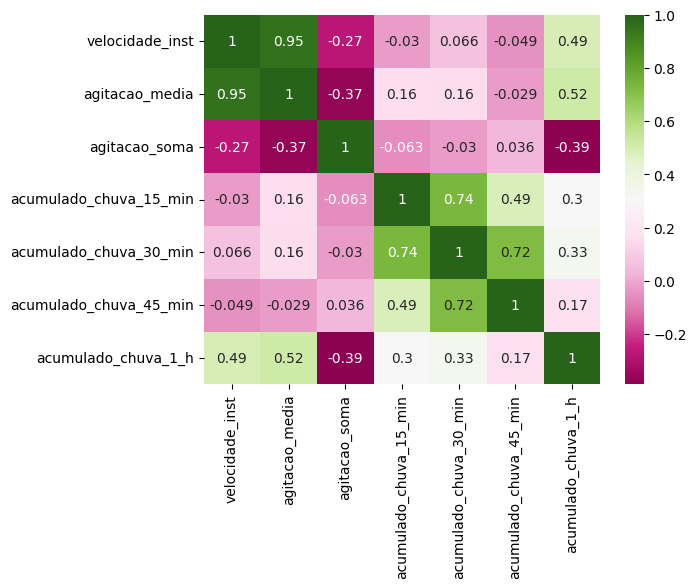

In [49]:
#Correlação DF Chuva Forte
df_chuva = df[(df['Class_Chuva']=='Chuva_Forte')]
df_cor = df_chuva[['velocidade_inst','agitacao_media','agitacao_soma', 'acumulado_chuva_15_min','acumulado_chuva_30_min', 'acumulado_chuva_45_min','acumulado_chuva_1_h']]
sns.heatmap(df_cor.corr(),annot=True,cmap='PiYG')
plt.show()